<a href="https://colab.research.google.com/github/ariqnfl/IYKRA-DF6/blob/main/Muhammad_Ariq_Naufal_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Practice Case

Muhammad Ariq Naufal

Data Fellowship 6

In [1]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ML_2_Fellow.csv',encoding="ISO-8859-1",dtype={'Kode_Pelanggan':str,'Kode_Bayar':str,'Kode_Barang':str})
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
# check null data
df.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [4]:
# check how many rows and column
df.shape

(541909, 8)

In [5]:
df.describe()

,Jumlah,Harga_Satuan
count,535874.000000,535874.000000
mean,9.587927,4.636533
std,153.292222,97.302232
min,-74215.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,74215.000000,38970.000000


# Data Preprocessing

check cust in every country

In [6]:
customer_count = df[['Kode_Pelanggan', 'Negara']].drop_duplicates()
customer_count = customer_count.groupby(['Negara'])['Kode_Pelanggan'].aggregate('count').reset_index().sort_values('Kode_Pelanggan', ascending=False)

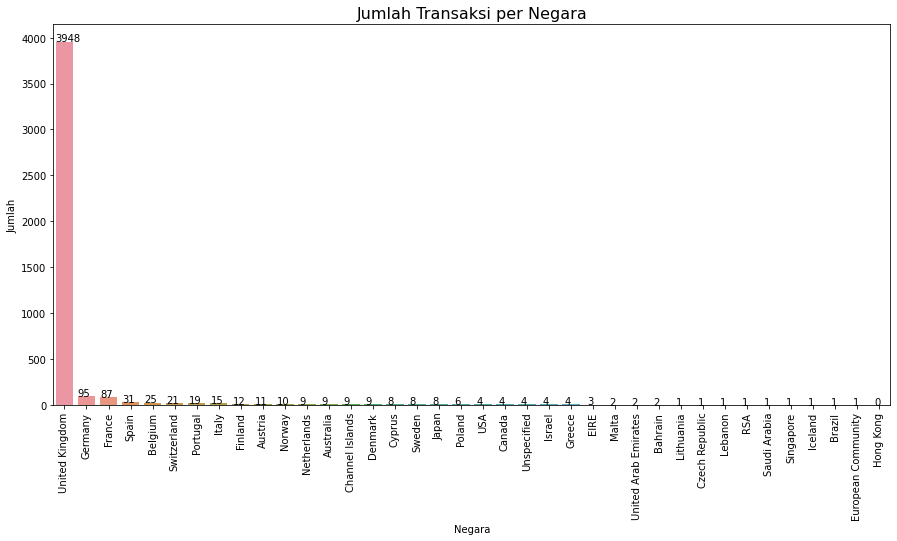

In [7]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x=customer_count['Negara'], y=customer_count['Kode_Pelanggan'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel('Jumlah')
plt.title('Jumlah Transaksi per Negara', fontsize=16)
plt.show()

Remove data with minus quantity

In [8]:
df[df['Jumlah'] < 0].head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548,United Kingdom


In [9]:
df = df[df['Jumlah'] > 0]

remove data who does not have kode pelangan

In [10]:
df = df[pd.notnull(df['Kode_Pelanggan'])]

remove whitespaces in Barang

In [11]:
df['Barang'] = df['Barang'].str.strip()

seperate UK and Not UK

In [12]:
df['Export'] = df['Negara'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Not UK')

convert tanggal transaksi to pd datetime

In [13]:
df['Tanggal_Transaksi'] = pd.to_datetime(df['Tanggal_Transaksi'])

In [14]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Export
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,UK
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,UK


# EDA

## Top 10 Items in UK

In [15]:
df_uk = df.query("Export =='UK'")
df_uk_top = df_uk[['Barang','Jumlah']].groupby('Barang').sum().nlargest(10,'Jumlah').reset_index()


Text(0.5, 1.0, 'Top 10 Items in UK')

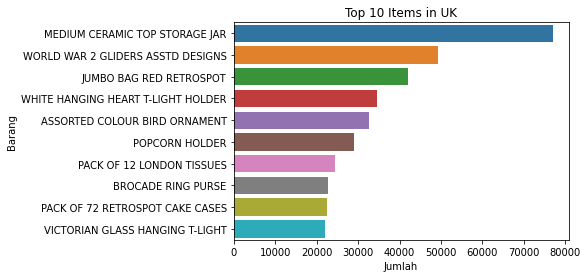

In [16]:
sns.barplot(data=df_uk_top,x='Jumlah',y='Barang')
plt.title('Top 10 Items in UK')

## Least item in UK

In [51]:
df_uk[['Barang','Jumlah']].groupby('Barang').sum().nsmallest(10,'Jumlah').reset_index()

,Barang,Jumlah
0,AMBER BERTIE GLASS BEAD BAG CHARM,1.0
1,AMBER GLASS/SHELL/PEARL NECKLACE,1.0
2,BAROQUE BUTTERFLY EARRINGS CRYSTAL,1.0
3,BLACK DROP EARRINGS W LONG BEADS,1.0
4,BLACK FINE BEAD NECKLACE W TASSEL,1.0
5,BLACK VINT ART DEC CRYSTAL BRACELET,1.0
6,BLACKCHRISTMAS TREE 30CM,1.0
7,BLOSSOM IMAGES SCRAP BOOK SET,1.0
8,BLUE LEAVES AND BEADS PHONE CHARM,1.0
9,BLUE NEW BAROQUE FLOCK CANDLESTICK,1.0


In [58]:
df_low = df_uk[['Barang','Jumlah']].groupby('Barang').sum().reset_index()
df_low[df_low['Jumlah'] < 5].count()

Barang    216
Jumlah    216
dtype: int64

## Top 10 items outside UK

In [18]:
df_nuk = df.query("Export =='Not UK'")
df_nuk_top = df_nuk[['Barang','Jumlah']].groupby('Barang').sum().nlargest(10,'Jumlah').reset_index()

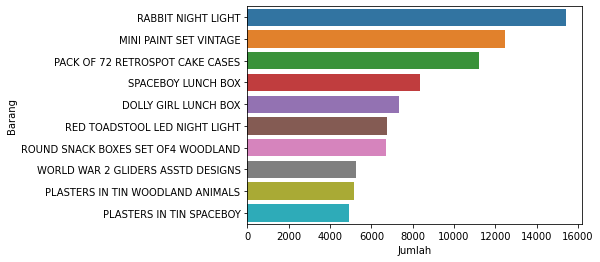

In [19]:
sns.barplot(data=df_nuk_top,y='Barang',x='Jumlah')

## Least item outside UK

In [20]:
df_nuk[['Barang','Jumlah']].groupby('Barang').sum().nsmallest(10,'Jumlah').reset_index()

,Barang,Jumlah
0,BLACK MINI TAPE MEASURE,1.0
1,CAST IRON HOOK GARDEN TROWEL,1.0
2,CHAMBRE HOOK,1.0
3,CROCHET WHITE RABBIT KEYRING,1.0
4,DANISH ROSE BEDSIDE CABINET,1.0
5,DANISH ROSE FOLDING CHAIR,1.0
6,FAUX FUR CHOCOLATE THROW,1.0
7,FRYING PAN RED POLKADOT,1.0
8,GLASS JAR KINGS CHOICE,1.0
9,High Resolution Image,1.0


## Most loyal customers

In [21]:
customer_loyal = df[['Kode_Pelanggan','Harga_Satuan']].groupby(['Kode_Pelanggan']).sum().sort_values(by='Harga_Satuan', ascending=False) 
customer_total = customer_loyal['Harga_Satuan'].head(10)
customer_number = customer_loyal.index[:10]

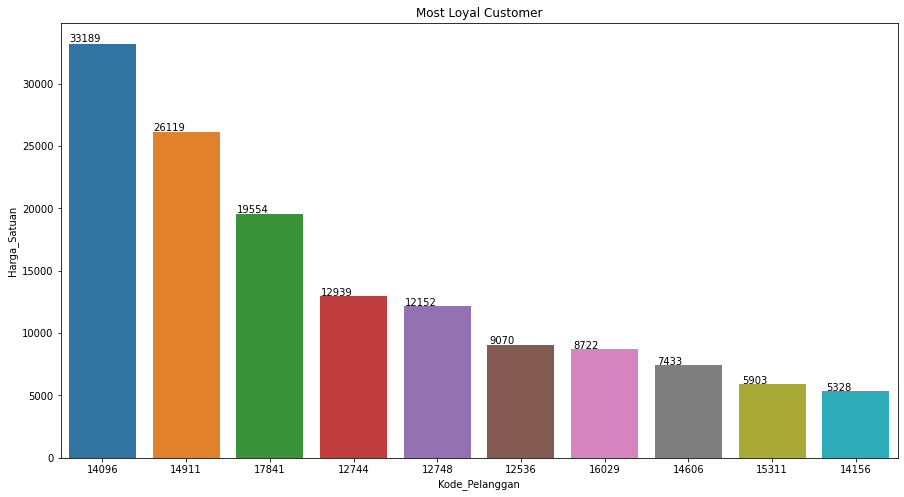

In [22]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=customer_number, y=customer_total)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Most Loyal Customer")
plt.show()

# Customer Segmentation

## RFM Analysis

* Recency: when is the last time the user transaction?
* Frequency: how many times does the user take this action?
* Monetary value: what is the sum of monetary value from this user throughout his/her lifetime?

use scale 1-4 to determine RFM Score

Create Total Price Feature

In [23]:
df['Total'] = df['Jumlah'] * df['Harga_Satuan']

See the min and max date of transaction

In [24]:
print("Min Date",df['Tanggal_Transaksi'].min(),"Max Date",df['Tanggal_Transaksi'].max())

Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


create the latest transaction variable and create rfm data

In [25]:
now = np.datetime64("2011-12-10")
df_rfm = df.groupby('Kode_Pelanggan').agg({'Tanggal_Transaksi': lambda x: (now - x.max()).days,
                                           'Kode_Bayar' : lambda x: len(x),
                                           'Total' : lambda x: x.sum()})
df_rfm.rename(columns={'Tanggal_Transaksi':'rec','Kode_Bayar':'freq','Total':'mon'},inplace=True)
df_rfm.head()

,rec,freq,mon
Kode_Pelanggan,,,
12346,325,1,77183.60
12347,2,181,4299.80
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


get RFM data distribution

In [26]:
quantile = df_rfm.quantile(q=[.25,.5,.75])
quantile

,rec,freq,mon
0.25,17.0,17.0,305.62
0.50,50.0,41.0,667.81
0.75,142.0,99.0,1652.58


create a function for RFM Score

In [27]:
# the low score is more better
def recScore(data,column):
  if data <= quantile[column][.25]:
    return 1
  elif data <= quantile[column][.5]:
    return 2
  elif data <= quantile[column][.75]:
    return 3
  else:
    return 4

# higher score is better
def freqMonScore(data,column):
  if data <= quantile[column][.25]:
    return 4
  elif data <= quantile[column][.5]:
    return 3
  elif data <= quantile[column][.75]:
    return 2
  else:
    return 1


In [28]:
df_rfm['R'] = df_rfm['rec'].apply(lambda x: recScore(x,'rec'))
df_rfm['F'] = df_rfm['freq'].apply(lambda x: freqMonScore(x,'freq'))
df_rfm['M'] = df_rfm['mon'].apply(lambda x: freqMonScore(x,'mon'))
df_rfm.head()

,rec,freq,mon,R,F,M
Kode_Pelanggan,,,,,,
12346,325,1,77183.60,4,4,1
12347,2,181,4299.80,1,1,1
12348,75,31,1797.24,3,3,1
12349,18,73,1757.55,2,2,1
12350,310,17,334.40,4,4,3


set rfmScore columns

In [29]:
df_rfm['rfmScore'] = df_rfm.R.map(str) + df_rfm.M.map(str) + df_rfm.M.map(str)
df_rfm['rfmScore'] = df_rfm['rfmScore'].astype('int')
df_rfm.head()

,rec,freq,mon,R,F,M,rfmScore
Kode_Pelanggan,,,,,,,
12346,325,1,77183.60,4,4,1,411
12347,2,181,4299.80,1,1,1,111
12348,75,31,1797.24,3,3,1,311
12349,18,73,1757.55,2,2,1,211
12350,310,17,334.40,4,4,3,433


## Using KMeans Clustering

In [30]:
from sklearn.cluster import KMeans

rfm_feature = df_rfm[['R','F','M','rfmScore']]

In [31]:
# searching the best clusters
clusters = []
for i in range(2,11):
    km = KMeans(n_clusters=i).fit(rfm_feature)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

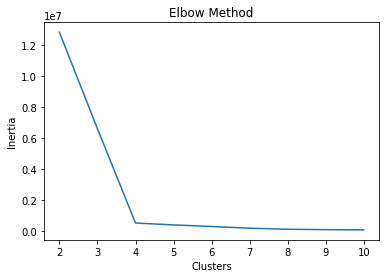

In [32]:
plt.plot(list(range(2,11)),clusters)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


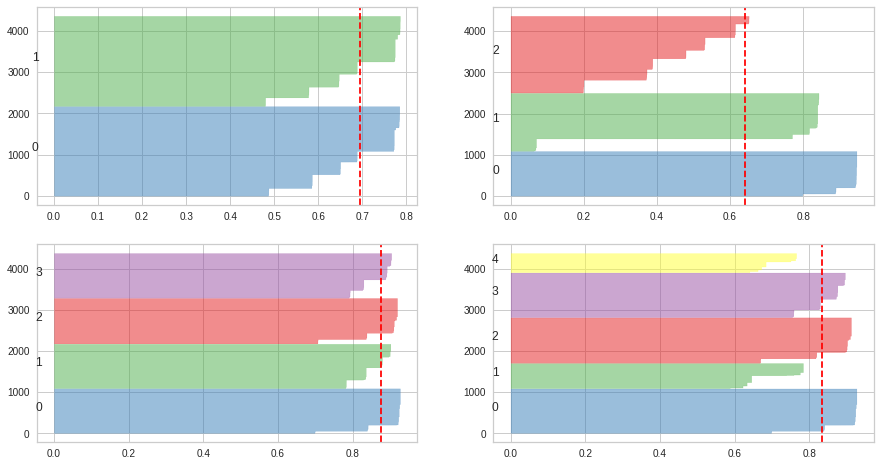

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_feature)

In [35]:
# KMeans with 4 cluster
km = KMeans(n_clusters=4).fit(rfm_feature)
label = km.predict(rfm_feature)
df_rfm['Labels'] = label

In [36]:
df_rfm.head()

,rec,freq,mon,R,F,M,rfmScore,Labels
Kode_Pelanggan,,,,,,,,
12346,325,1,77183.60,4,4,1,411,1
12347,2,181,4299.80,1,1,1,111,2
12348,75,31,1797.24,3,3,1,311,3
12349,18,73,1757.55,2,2,1,211,0
12350,310,17,334.40,4,4,3,433,1


See each Labels criteria

Daily Customer, High Spender

In [37]:
df_rfm[df_rfm['Labels'] == 0].head()

,rec,freq,mon,R,F,M,rfmScore,Labels
Kode_Pelanggan,,,,,,,,
12349,18,73,1757.55,2,2,1,211,0
12352,36,85,2506.04,2,2,1,211,0
12356,22,59,2811.43,2,2,1,211,0
12357,33,125,6065.71,2,1,1,211,0
12371,44,63,1887.96,2,2,1,211,0


In [61]:
len(df_rfm[df_rfm['Labels'] == 0])

1073

Lost Customer, Low Spender

In [38]:
df_rfm[df_rfm['Labels'] == 1].head()

,rec,freq,mon,R,F,M,rfmScore,Labels
Kode_Pelanggan,,,,,,,,
12346,325,1,77183.6,4,4,1,411,1
12350,310,17,334.4,4,4,3,433,1
12353,204,4,89.0,4,4,4,444,1
12354,232,58,1079.4,4,2,2,422,1
12355,214,13,459.4,4,4,3,433,1


In [59]:
len(df_rfm[df_rfm['Labels'] == 1])

1080

Average User

In [39]:
df_rfm[df_rfm['Labels'] == 2].head(10)

,rec,freq,mon,R,F,M,rfmScore,Labels
Kode_Pelanggan,,,,,,,,
12347,2,181,4299.80,1,1,1,111,2
12358,1,19,1168.06,1,3,2,122,2
12362,3,266,5226.23,1,1,1,111,2
12364,7,84,1308.06,1,2,2,122,2
12367,4,11,168.90,1,4,4,144,2
12375,10,17,457.50,1,4,3,133,2
12381,4,86,1821.91,1,2,1,111,2
12388,15,100,2780.66,1,1,1,111,2
12417,3,191,3625.25,1,1,1,111,2


In [60]:
len(df_rfm[df_rfm['Labels'] == 2])

1102

Lost Customer, Big Spender

In [40]:
df_rfm[df_rfm['Labels'] == 3].head(10)

,rec,freq,mon,R,F,M,rfmScore,Labels
Kode_Pelanggan,,,,,,,,
12348,75,31,1797.24,3,3,1,311,3
12359,57,246,6355.78,3,1,1,311,3
12360,52,128,2657.02,3,1,1,311,3
12363,109,23,552.00,3,3,3,333,3
12370,51,163,3412.19,3,1,1,311,3
12372,71,52,1298.04,3,2,2,322,3
12378,129,218,3957.62,3,1,1,311,3
12379,81,40,852.24,3,3,2,322,3
12390,79,32,549.84,3,3,3,333,3


In [62]:
len(df_rfm[df_rfm['Labels'] == 3])

1082

# Hidden Insight

In [41]:
print("Best Customers:",len(df_rfm[df_rfm['rfmScore'] == 111]))
print("Loyal Customers:",len(df_rfm[df_rfm['F'] == 1]))
print("Big Spenders:",len(df_rfm[df_rfm['M'] == 1]))
print("Almost Lost:",len(df_rfm[df_rfm['rfmScore'] == 311]))
print("Lost Customers:",len(df_rfm[df_rfm['rfmScore'] == 411]))
print("Lost Cheap Customers:",len(df_rfm[df_rfm['rfmScore'] == 444]))

Best Customers: 550
Loyal Customers: 1083
Big Spenders: 1084
Almost Lost: 185
Lost Customers: 52
Lost Cheap Customers: 517
